#### Import Required Libraries

In [2]:
# libraries to process file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# libraries version

print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Numpy version: 2.3.5
Pandas version: 2.3.3


#### Import Dataset

In [4]:
# import dataset file and get pandas dataframe. also copy original dataframe for future reference.
data = pd.read_csv("../data/customer-churn.csv")
data_original = data.copy()

#### Summary of Dataset
This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not. It is suitable for exploring and analyzing factors influencing customer churn in banking institutions and for building predictive models to identify customers at risk of churning.

In [5]:
# check total number of rows and columns
data.shape

(10000, 14)

In [6]:
# check first five rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Columns Description
`RowNumber:` The sequential number assigned to each row in the dataset.

`CustomerId:` A unique identifier for each customer.

`Surname:` The surname of the customer.

`CreditScore:` The credit score of the customer.

`Geography:` The geographical location of the customer (e.g., country or region).

`Gender:` The gender of the customer.

`Age:` The age of the customer.

`Tenure:` The number of years the customer has been with the bank.

`Balance:` The account balance of the customer.

`NumOfProducts:` The number of bank products the customer has.

`HasCrCard:` Indicates whether the customer has a credit card (binary: yes/no).

`IsActiveMember:` Indicates whether the customer is an active member (binary: yes/no).

`EstimatedSalary:` The estimated salary of the customer.

`Exited:` Indicates whether the customer has exited the bank (binary: yes/no).

In [7]:
# check all available columns
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# check last five rows
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
# check random data
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4823,4824,15744789,McConnell,786,Spain,Female,32,6,114512.59,1,1,0,15796.66,0
1861,1862,15786852,Nwachukwu,565,Germany,Female,38,2,158651.29,2,1,1,179445.28,0
4617,4618,15799932,Iweobiegbunam,812,France,Male,24,10,0.00,2,1,1,156906.15,0
8934,8935,15630641,Shao,846,France,Female,37,6,127103.97,1,1,1,41516.44,0
4312,4313,15720687,Chidubem,576,France,Female,41,4,112609.91,1,0,0,191035.18,1


In [10]:
# check all columns datatypes also observe non-null values
data.info()

# -------------------------------------------------------------------------------------------
# Observation :
# Tha dataset contains 10000 entries, indexed from 0 to 9999. There are total 14 features.
# All 14 features show a non null count of 10000. This means there are no missing values in any of the columns.

# The dataset is composed of three main data types: 
# int64 (9 columns) - These are typically used discrete numerical data and categorical/binary labels.
# float64 (2 columns) - These are used for continuous numerical data.
# object (3 columns) - These are typically string data.

# "RowNumber" and "CustomerId" are unique identifiers. "Surname" is also an identifier like column. These columns are generally not useful for direct model training.
# "Geography" and "Gender" both will need encoding.
# "Exited" is a target variable (0 for "did not exit", 1 for "exited")

# -------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
# checking statistical measure
data.describe(include="number").T

# -------------------------------------------------------------------------------------------
# Observation :

# RowNumber & CustomerId - Irrelevant columns for prediction, should be dropped.
# CreditScore - The mean credit score is approx 650 with std 96. values range from 350 to 850. The median is 652, indicating symmetric distribution.
# Age - The average age is approx 38 years. The youngest customer is 18 and the oldest is 92. The median is 37 years, which is close to mean, suggesting a relatively normal distribution, though slightly right-skewed (mean > median).
# Tenure - Customers have been with the bank for an average 5 years. The scale runs from 0 to 10 years, with a very even spread.
# Balance - The mean balance is 76485, but the std is high 62397. The 25% percentile is 0. This means at least 25% of customers have a zero balance.
# NumOfProducts - Most customers use 1 or 2 products (mean is 1.53). The max is 4, but since the 75th percentile is 2, very few customers use 3 or 4 products.
# HasCrCard - The mean is 0.7055, meaning approx 70.5% of customers possess a credit card.
# IsActiveMember - The mean is 0.51, indicating an almost even split between active and inactive members.
# EstimatedSalary - The mean salary is approx 1,00,090, with very wide range from 11.58 to 1,99,992. The distribution looks uniform, as the median is almost identical to the mean.
# Exited - The mean of exited column is 0.2037. since, this is a binary column, this indicates that only 20% of customers have exited, while 80% are stayed.

# -------------------------------------------------------------------------------------------

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [13]:
data.describe(include="O").T

# -------------------------------------------------------------------------------------------
# Observation :
# Surname - There are 2932 unique surnames. Given there are 10,000 entries, this indicates many repeated surnames, but since the most frequent surname (Smith) only appears 32 times.
# Geography - There are 3 locations. France is the most frequent, appearing 5014 times. This indicates a significant concentration of customers in one country.
# Gender - There are 2 unique values. "Male" is the most frequent, appearing 54.57% slightly majority of male customers.

# -------------------------------------------------------------------------------------------

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


#### Check Duplicate Records

In [14]:
data.duplicated().sum()

# -------------------------------------------------------------------------------------------
# Observation :
# There is no duplicated entries in dataset.
# -------------------------------------------------------------------------------------------

np.int64(0)

#### Removing Irrelevant Features

In [15]:
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])
data.shape

(10000, 11)

In [16]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Change Datatype

In [17]:
for col in ["Tenure", "NumOfProducts", "HasCrCard" , "IsActiveMember", "Exited"]:
    data[col] = data[col].astype("object")

#### Types of Columns
- Numerical Columns - CreditScore, Age, Balance, EstimatedSalary
- Categorical Columns - Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited

In [18]:
numerical_cols = data.select_dtypes(include="number").columns
categorical_cols = data.select_dtypes(include="O").columns

#### Univariate Analysis for Numerical Features

In [19]:
def num_univariate(df, column):
    print("-"*100)
    print(f"Feature Name: {column}")
    print("\nDescriptive Statistics")
    print(df[column].describe())
    print(f"\nSkewness: {np.round(df[column].skew(), 2)}")

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True)

    sns.histplot(data, x=column, kde=True, ax=ax[0])
    ax[0].set_title(f"Distribution of {column}")
    
    sns.boxplot(data, x=column, ax=ax[1])

    plt.tight_layout()
    plt.show()

----------------------------------------------------------------------------------------------------
Feature Name: CreditScore

Descriptive Statistics
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

Skewness: -0.07


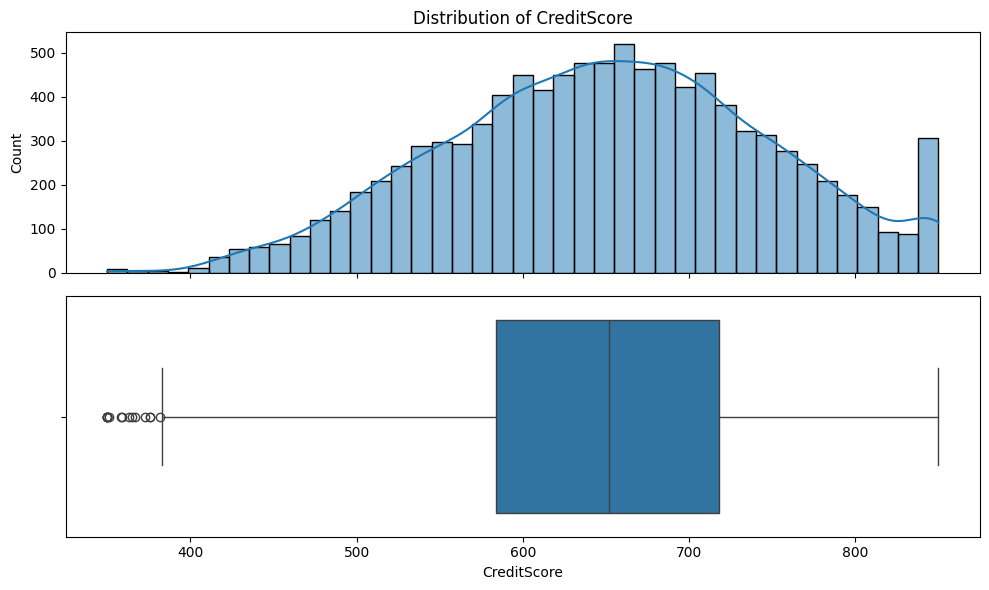

----------------------------------------------------------------------------------------------------
Feature Name: Age

Descriptive Statistics
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

Skewness: 1.01


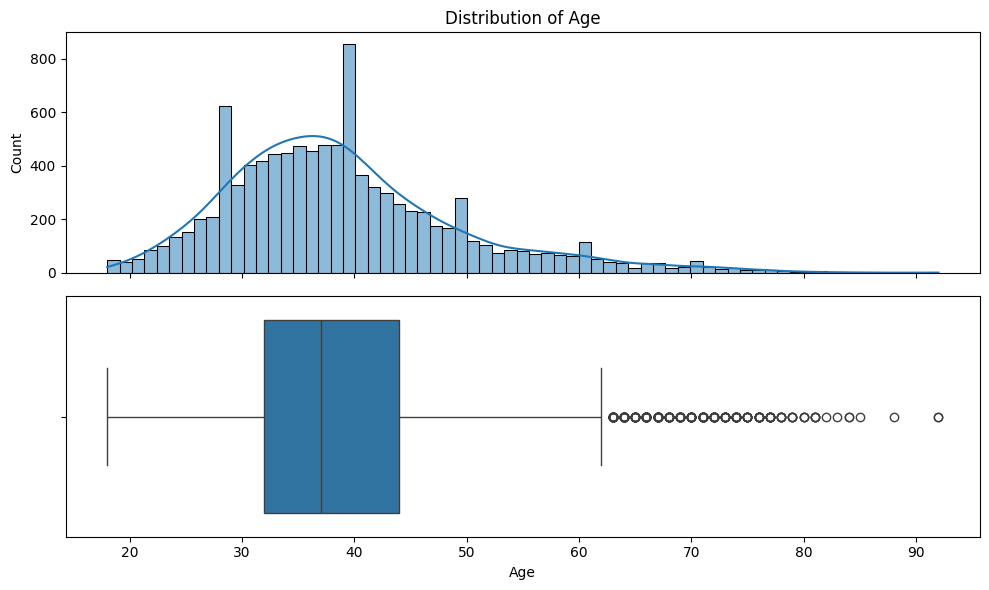

----------------------------------------------------------------------------------------------------
Feature Name: Balance

Descriptive Statistics
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

Skewness: -0.14


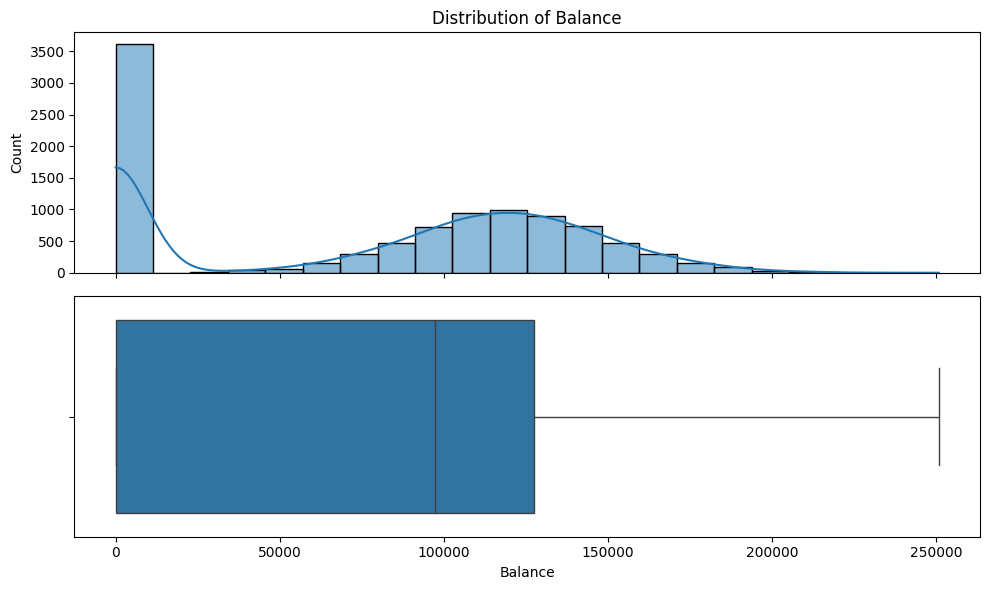

----------------------------------------------------------------------------------------------------
Feature Name: EstimatedSalary

Descriptive Statistics
count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

Skewness: 0.0


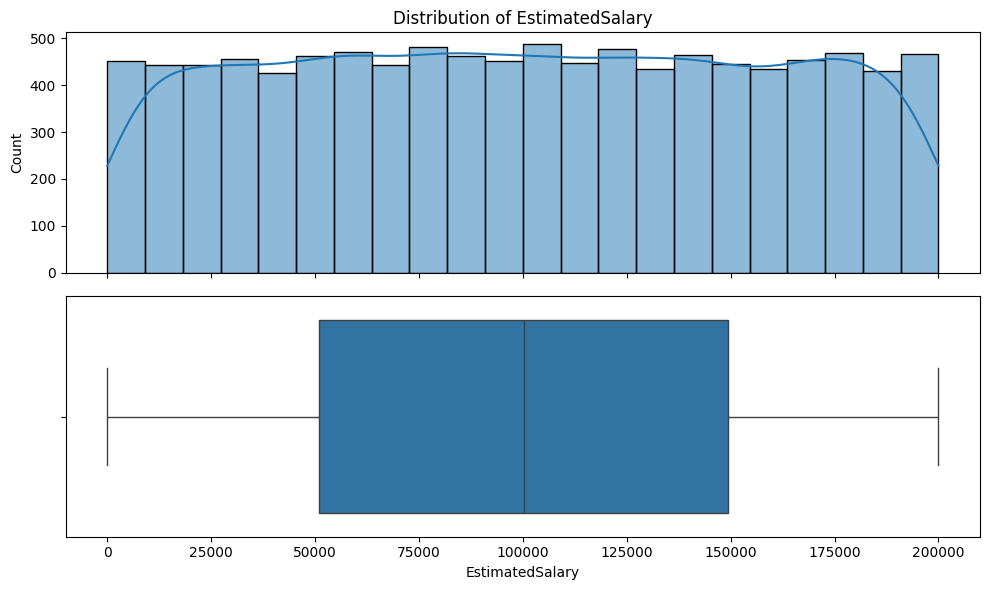

In [20]:
for col in numerical_cols:
    num_univariate(data, col)


# -------------------------------------------------------------------------------------------
# Observation :

# feature name: CreditScore
# Distribution Shape - The distribution is approximately Normal (Gaussian) and bell-shaped.
# Skewness - (-0.07) This is extremely close to 0, indicating the data is effectively is symmetrical.
# Outliers - The boxplots reveals outliers on the lower end (below approx 380). There are no outliers on the higher end.
# The mean and median are almost identical, confirming the symmetry. The range is 350 to 850.

# feature name: Age
# Distribution Shape - The distribution is right-skewed (+ve skewed).
# Skewness - (1.01) The tail extends towards the right (older ages).
# Outliers - The boxplot shows a significant number of outliers on the upper end, specifically starting around age 62.
# The majority of customers are between 32 and 44 years old (interquartile range).
# The mean age is higher than the median, which is typical for right-skewed data.

# feature name: Balance
# Distribution Shape - This is a bimodal distribution. There is a massive spike at 0. A very large portion of customers have a bank balance of 0.
# if ignore the 0 values, the remaining data seems to follow normal distribution.
# The boxplot shows outliers on high end (approx greater than 240k).

# feature name: EstimatedSalary
# Distribution Shape - The distribution is Uniform. The bars are roughly the same height across the entire range.
# Skewness - (0.0) This is perfectly symmetrical.
# Outliers - The boxplot shows no outliers.

# -------------------------------------------------------------------------------------------

#### Univariate Analysis for Categorical Features

In [21]:
def cat_univariate(df, column):
    print("-"*100)
    print(f"Feature Name: {column}")

    print("\nValue Counts:")
    print(df[column].value_counts().head())
    print(f"\nMissing Values: {df[column].isnull().sum()}")

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    sns.countplot(df, x=col, ax=ax[0])
    ax[0].set_title(f"Countplot of {column}")   
    ax[0].set_xlabel(column)
    ax[0].set_ylabel("Count")

    df[column].value_counts().plot.pie(
        autopct="%1.1f%%", ax=ax[1], startangle=90, cmap="tab20"
    )
    ax[1].set_ylabel("")
    ax[1].set_title(f"Pie Chart of {column}")

    plt.tight_layout()
    plt.show()

----------------------------------------------------------------------------------------------------
Feature Name: Geography

Value Counts:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Missing Values: 0


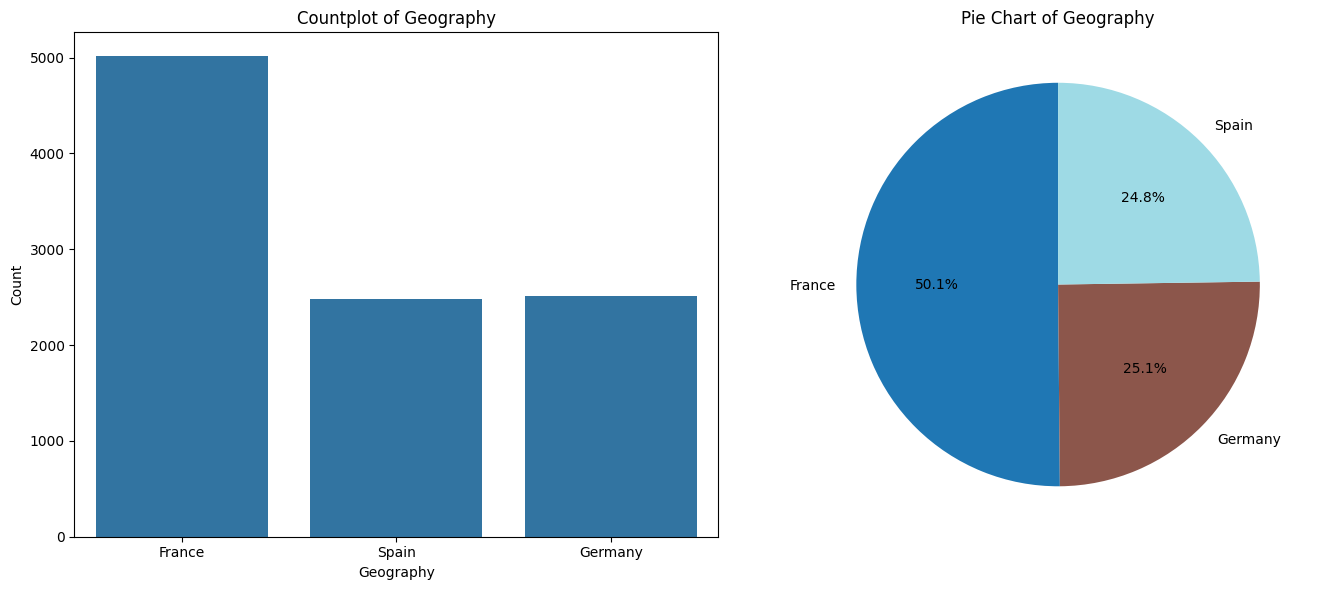

----------------------------------------------------------------------------------------------------
Feature Name: Gender

Value Counts:
Gender
Male      5457
Female    4543
Name: count, dtype: int64

Missing Values: 0


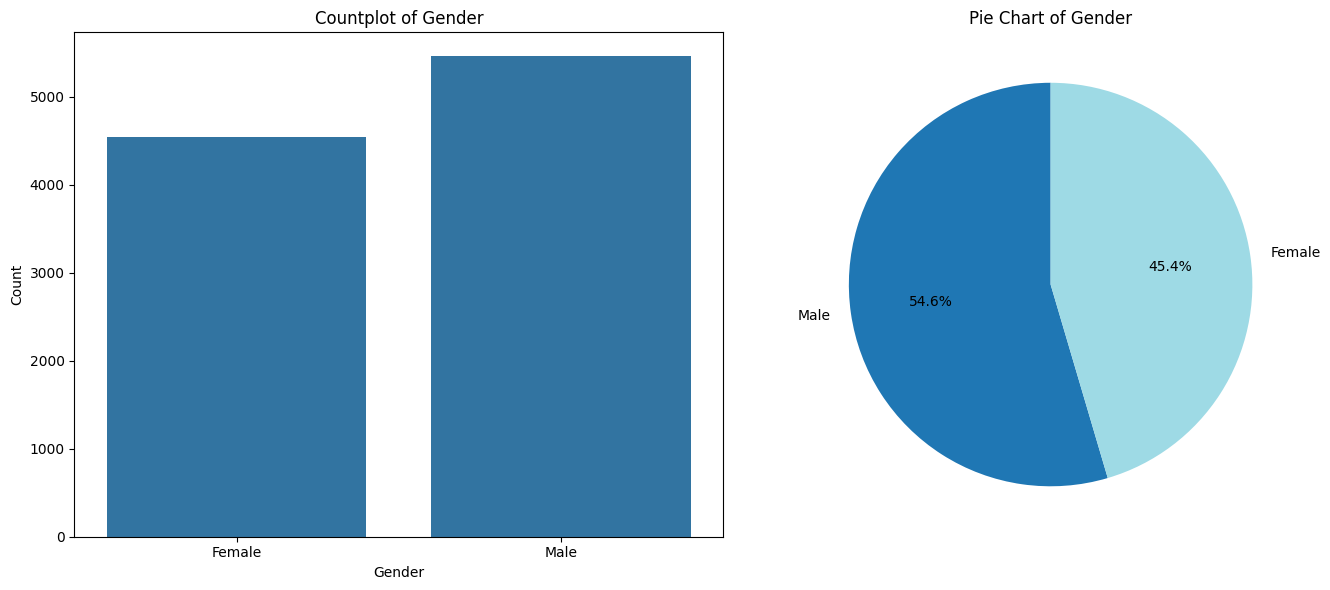

----------------------------------------------------------------------------------------------------
Feature Name: Tenure

Value Counts:
Tenure
2    1048
1    1035
7    1028
8    1025
5    1012
Name: count, dtype: int64

Missing Values: 0


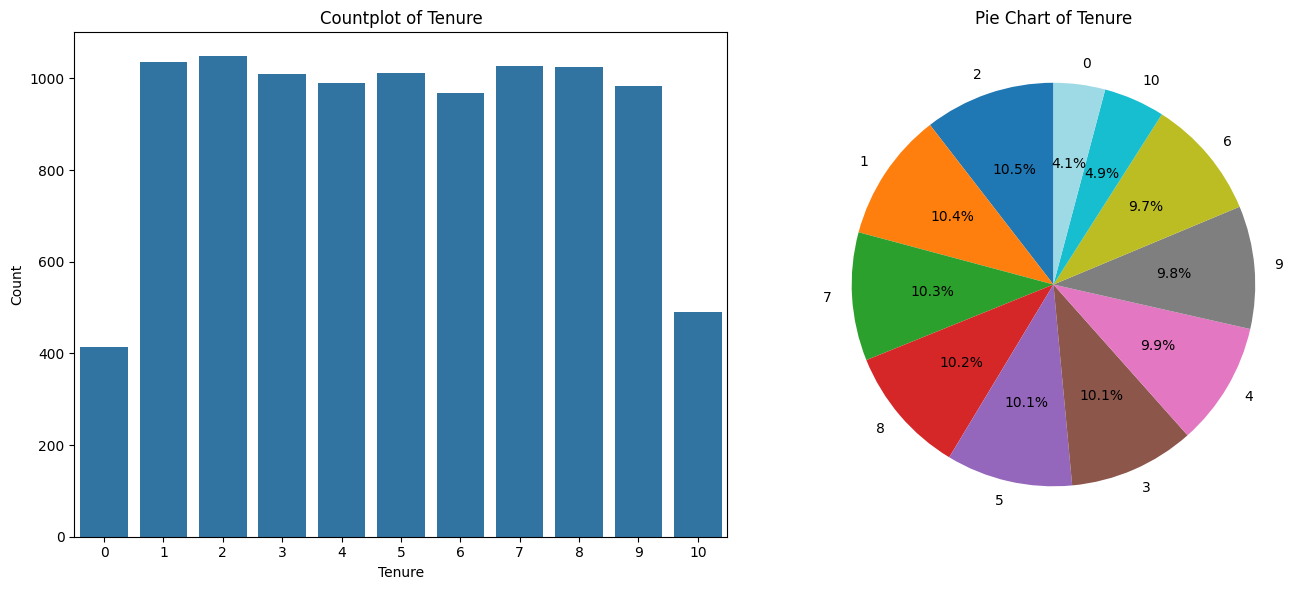

----------------------------------------------------------------------------------------------------
Feature Name: NumOfProducts

Value Counts:
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Missing Values: 0


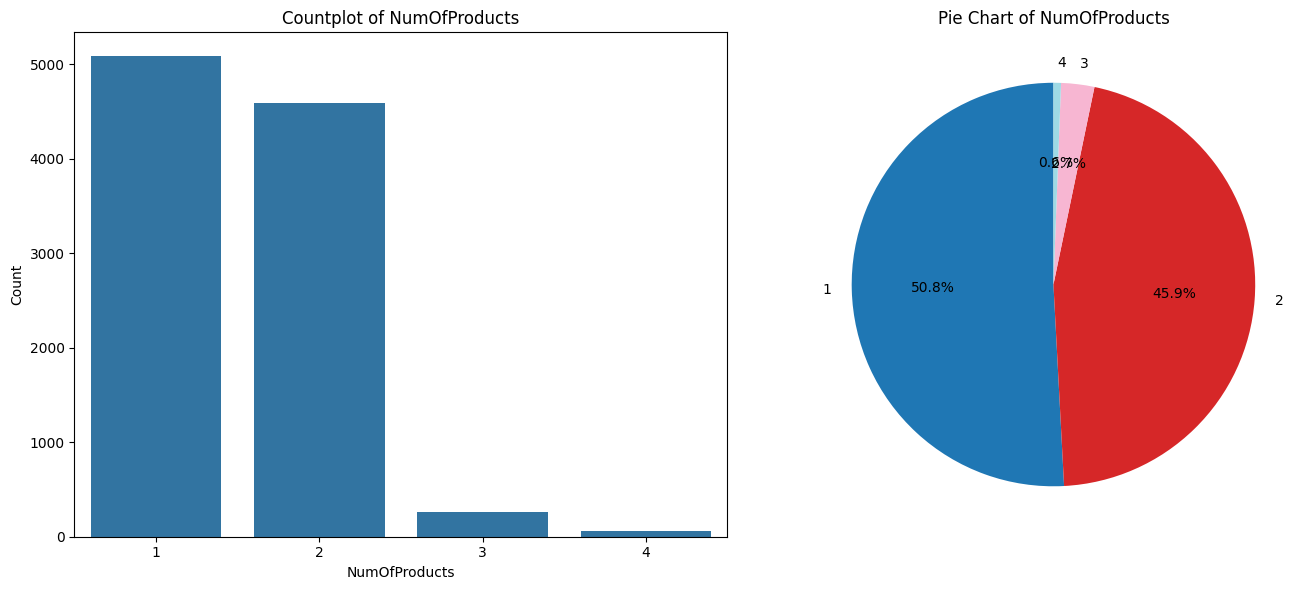

----------------------------------------------------------------------------------------------------
Feature Name: HasCrCard

Value Counts:
HasCrCard
1    7055
0    2945
Name: count, dtype: int64

Missing Values: 0


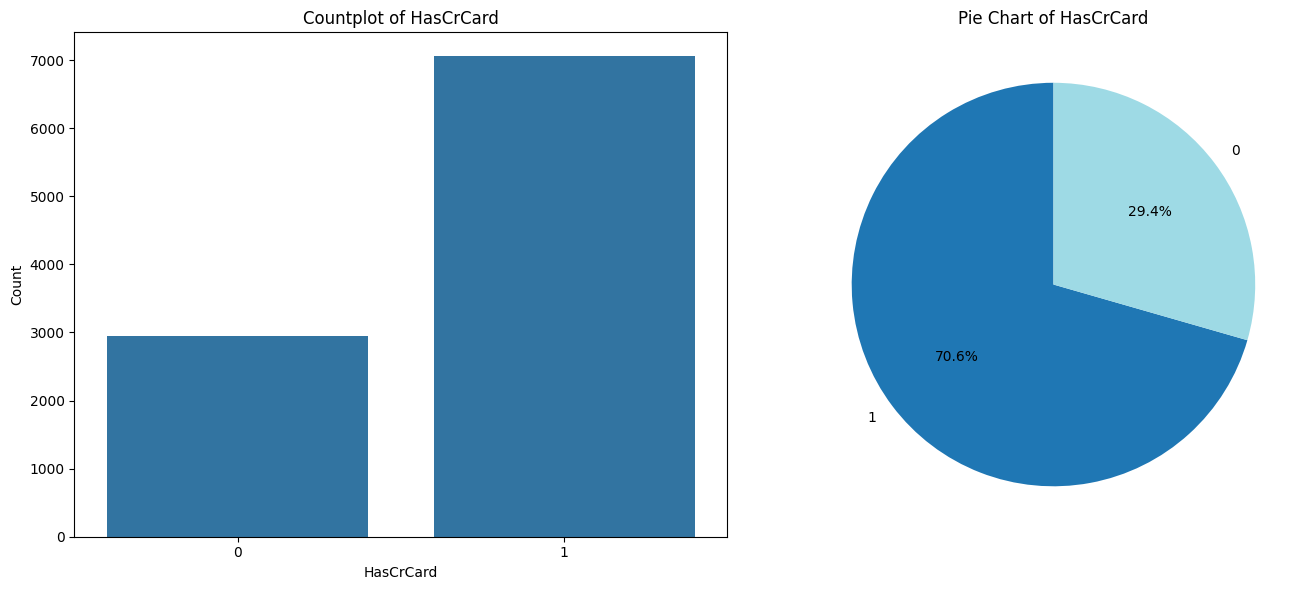

----------------------------------------------------------------------------------------------------
Feature Name: IsActiveMember

Value Counts:
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

Missing Values: 0


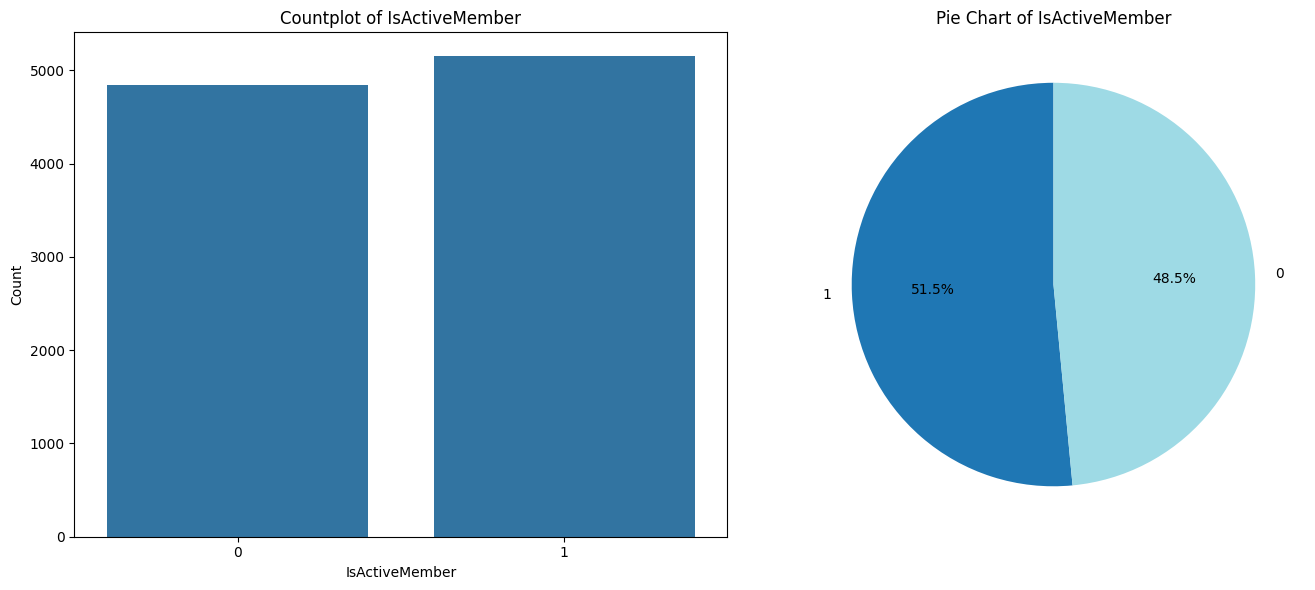

----------------------------------------------------------------------------------------------------
Feature Name: Exited

Value Counts:
Exited
0    7963
1    2037
Name: count, dtype: int64

Missing Values: 0


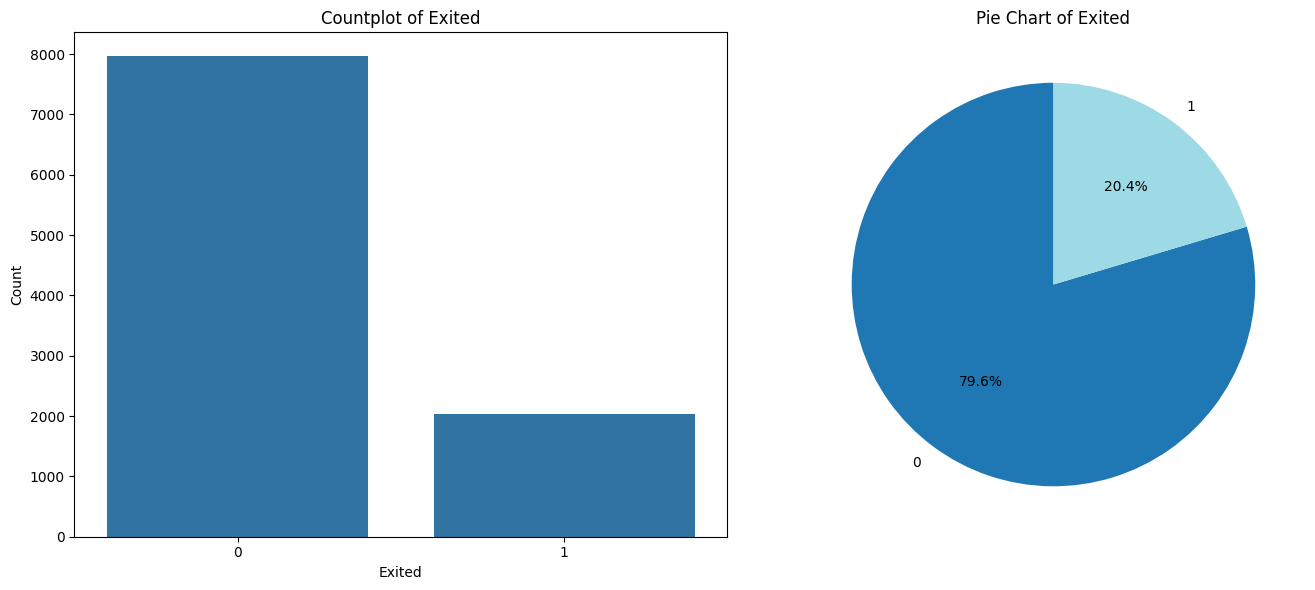

In [22]:
for col in categorical_cols:
    cat_univariate(data, col)

# -------------------------------------------------------------------------------------------
# Observation :

# feature name: Geography
# France accounts for half the dataset. Spain & Germany are split evenly.
# The model might become biased towards french customers if the churn behavior in france is different from spain & germany.

# feature name: Gender
# Balanced class (Male: 54%, Female: 45%)

# feature name: Tenure
# The number of years a customer has been with the bank is spread almost perfectly evenly from 1 to 9 years. Extremes 0 and 10 years have slightly fewer counts.

# feature name: NumOfProducts
# The distribution is heavily skewed 96.7% of customers hold either 1 or 2 products. customers with 3 or 4 products are extremely rares. The model may struggle to learn pattern for customers with 3 or 4 products.

# feature name: HasCrCard
# The majority of customers possesss a credit card. specifically, 70.6% hold credit card, while only 29.4% do not.

# feature name: IsActiveMember
# Very well balanced (Active: 51%, Inactive: 48%)

# feature name: Exited
# This feature is imbalanced. only 20.4% of customers are exited, while 79.6% stayed.

# -------------------------------------------------------------------------------------------

#### Bivariate Analysis - Categorical vs Categorical

In [23]:
def cat_cat_bivariate(df, col1, col2):
    fig, ax = plt.subplots(1, 2, figsize=(12,6))

    sns.barplot(df, x=col1, y=col2, ax=ax[0])
    ax[0].set_title(f"Barplot of {col1} vs {col2}")

    sns.heatmap(pd.crosstab(df[col2], df[col1]), annot=True, fmt="d", linewidth=0.5, linecolor="white", ax=ax[1])
    ax[1].set_title(f"Heatmap of {col1} vs {col2}")
    ax[1].set_ylabel("")

    plt.tight_layout()
    plt.show()

In [24]:
cat_pairs = []

for col in categorical_cols.drop("Exited"):
    cat_pairs.append((col, "Exited"))

cat_pairs

[('Geography', 'Exited'),
 ('Gender', 'Exited'),
 ('Tenure', 'Exited'),
 ('NumOfProducts', 'Exited'),
 ('HasCrCard', 'Exited'),
 ('IsActiveMember', 'Exited')]

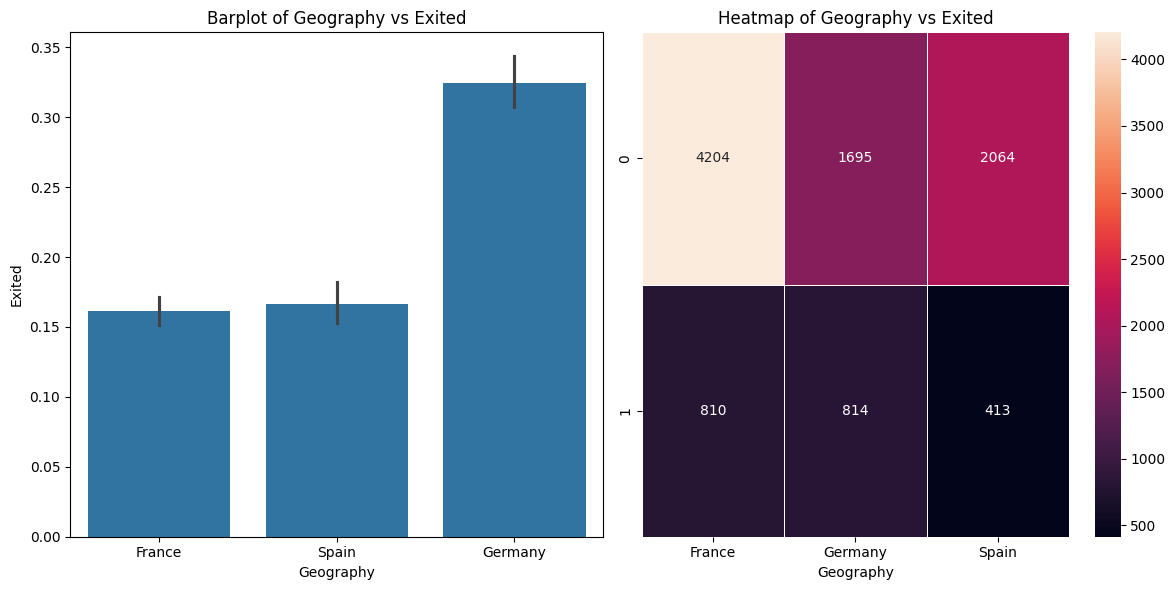

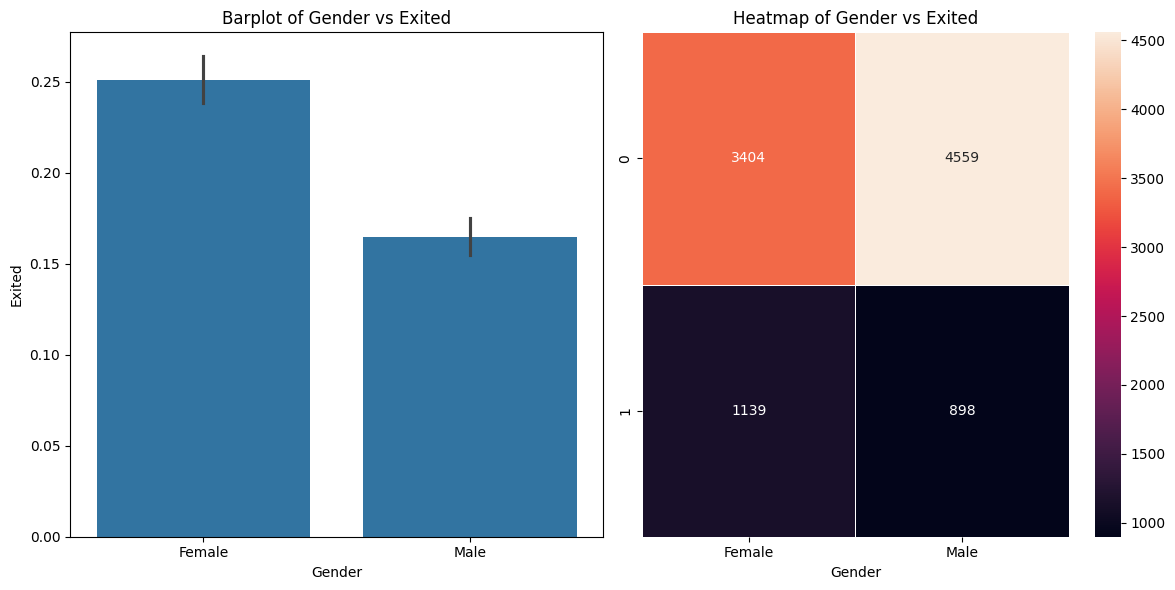

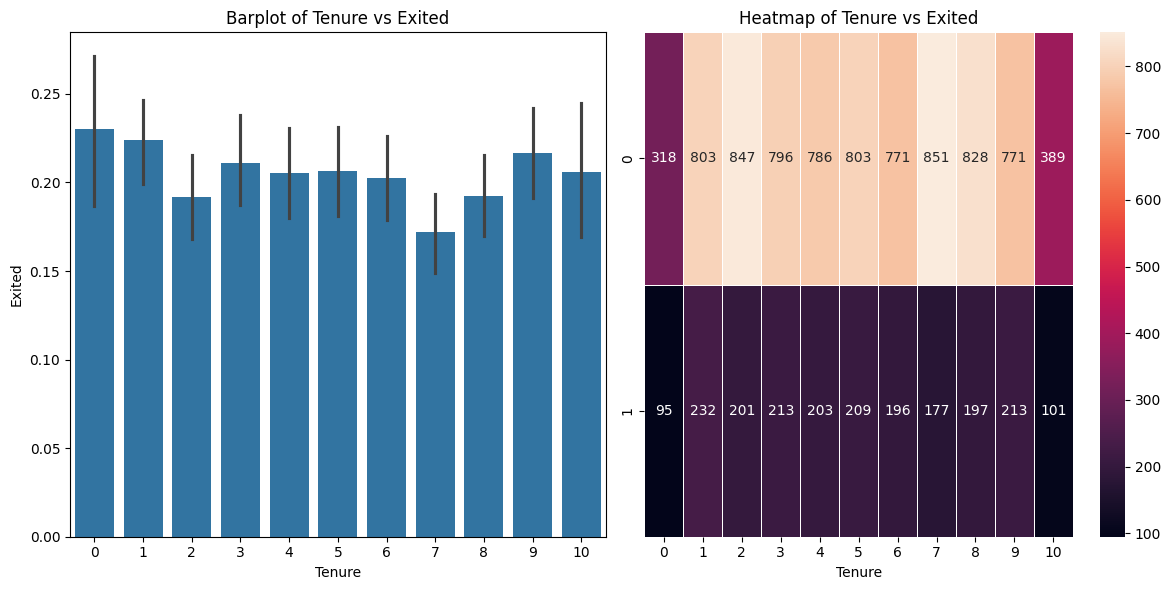

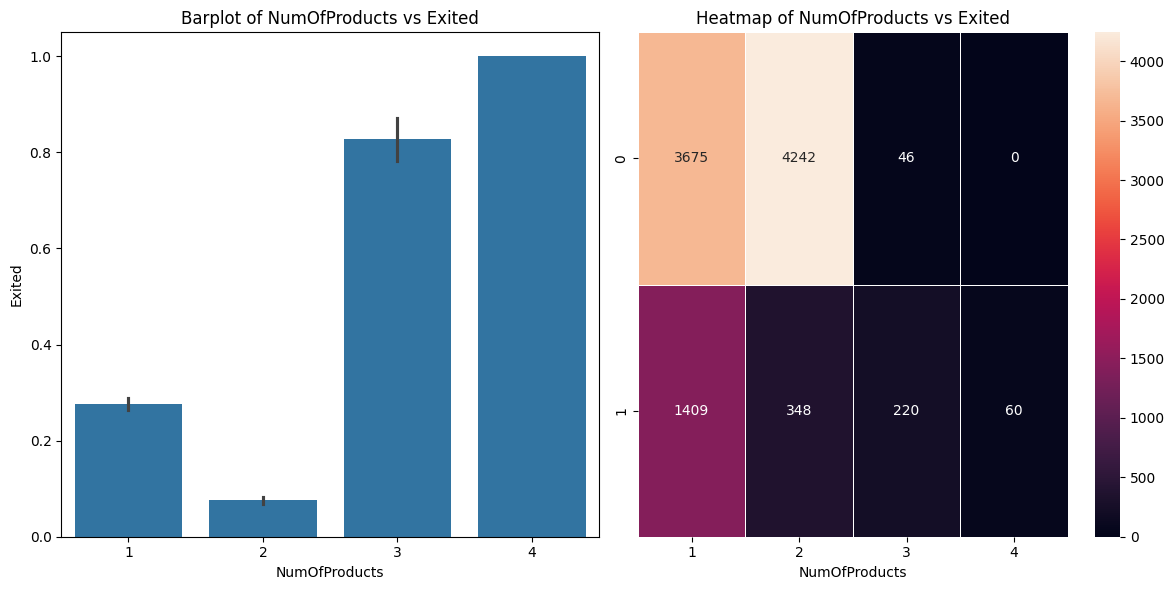

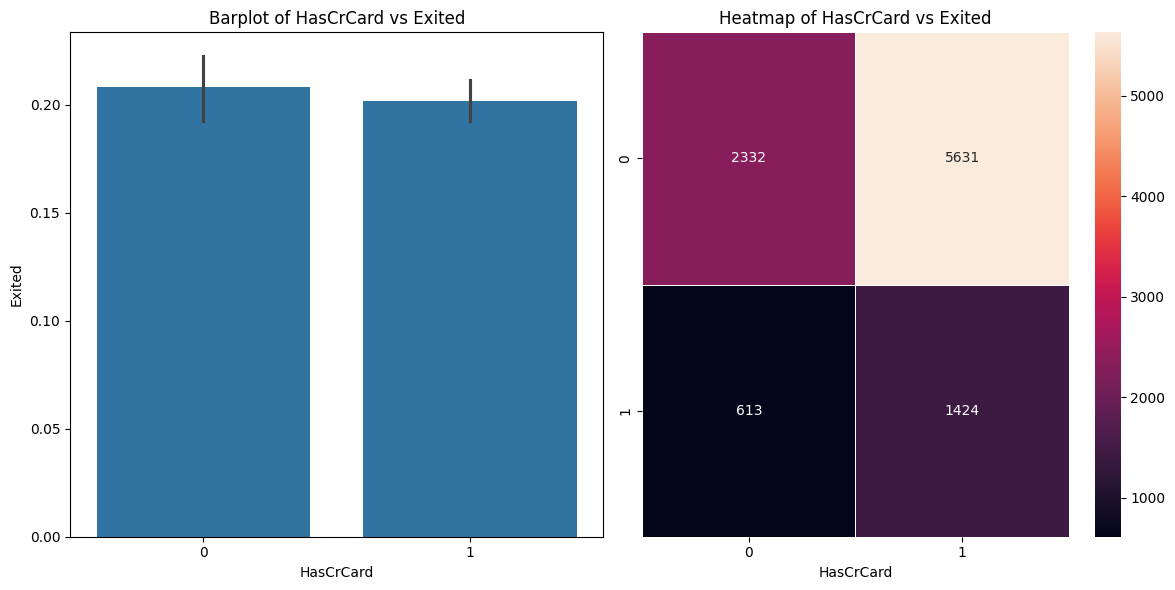

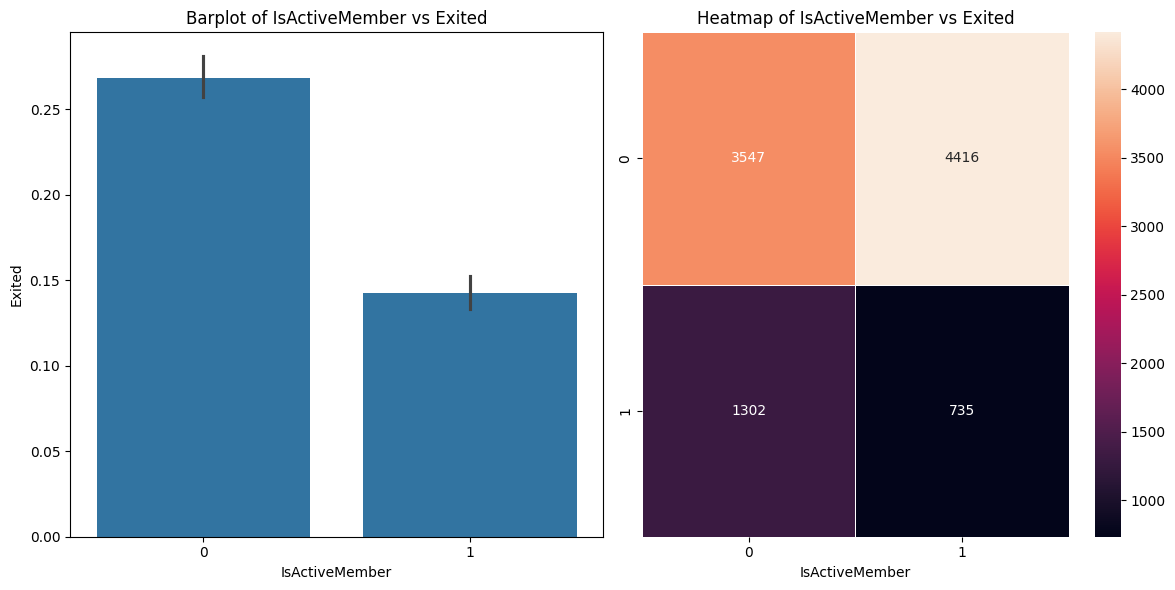

In [25]:
for col1, col2 in cat_pairs:
    cat_cat_bivariate(data, col1, col2)

# -------------------------------------------------------------------------------------------
# Observation :

# Geography vs Exited
# Germany is the highest risk region. The churn rate in Germany is double that of France and Spain.
# Geography is a crucial predictor. The model needs to explicitly distinguish "Germany" from the others.

# Gender vs Exited
# Females have a higher churn rate compared to Males.

# Tenure vs Exited
# The churn rate is consistent across all tenure years.

# NumOfProducts vs Exited
# This feature shows non-linear relationship. customers with 2 products are lowest churn rate.
# high churn rate for customers with 3 or 4 products.

# HasCrCard vs Exited
# The churn rate is nearly identical whether customer has a credit card or not.

# IsActiveMember vs Exited
# Inactive members are more likely to churn compared to active members.

# -------------------------------------------------------------------------------------------

#### Bivariate Analysis - Numerical vs Numerical


In [26]:
def num_num_bivariate(df, col1, col2):

    print("-"*100)
    print(f"Correlation Score: {np.round(df[col1].corr(df[col2]), 2)}")

    
    fig, ax = plt.subplots(1, 1)
    sns.scatterplot(df, x=col1, y=col2, hue="Exited")
    ax.set_title(f"Scatter Plot of {col1} and {col2}")
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)

    plt.tight_layout()
    plt.show()

In [27]:
num_pairs = []

for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        num_pairs.append((numerical_cols[i], numerical_cols[j]))

num_pairs

[('CreditScore', 'Age'),
 ('CreditScore', 'Balance'),
 ('CreditScore', 'EstimatedSalary'),
 ('Age', 'Balance'),
 ('Age', 'EstimatedSalary'),
 ('Balance', 'EstimatedSalary')]

----------------------------------------------------------------------------------------------------
Correlation Score: -0.0


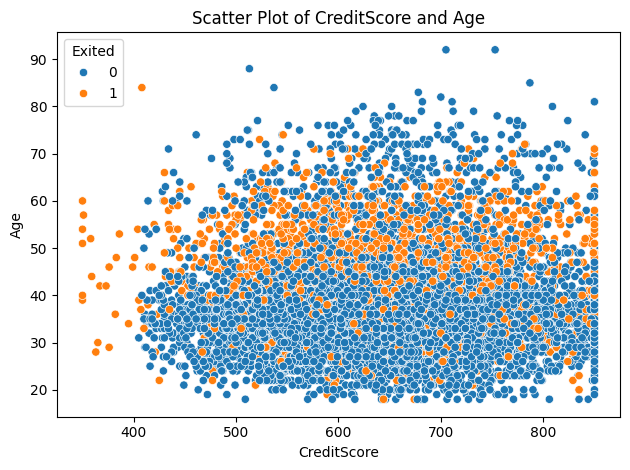

----------------------------------------------------------------------------------------------------
Correlation Score: 0.01


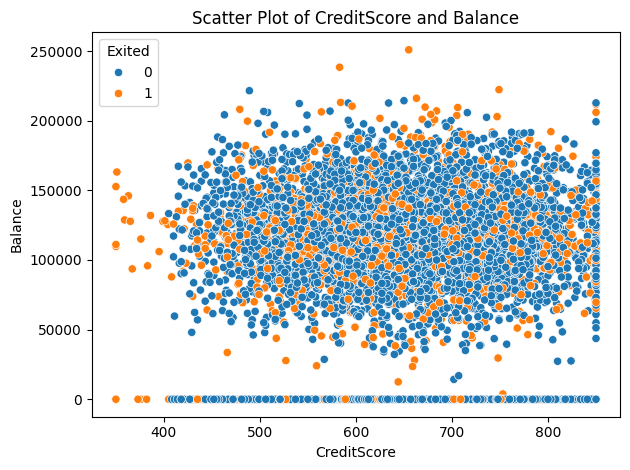

----------------------------------------------------------------------------------------------------
Correlation Score: -0.0


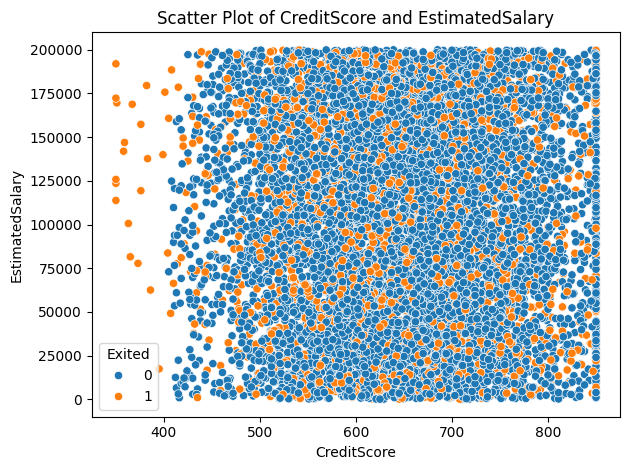

----------------------------------------------------------------------------------------------------
Correlation Score: 0.03


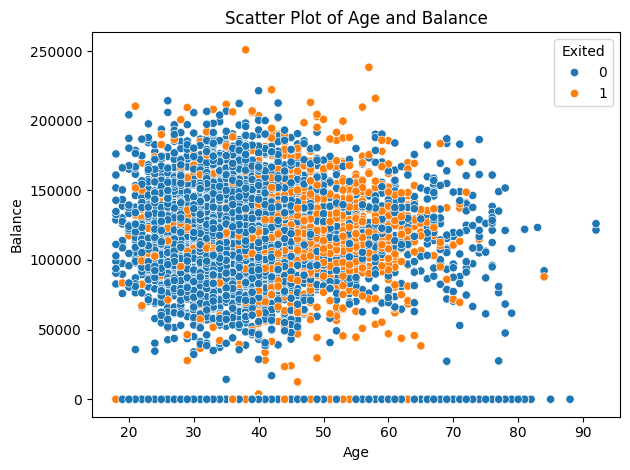

----------------------------------------------------------------------------------------------------
Correlation Score: -0.01


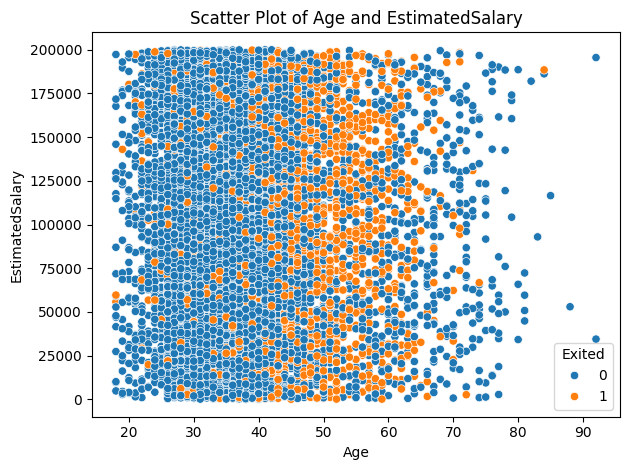

----------------------------------------------------------------------------------------------------
Correlation Score: 0.01


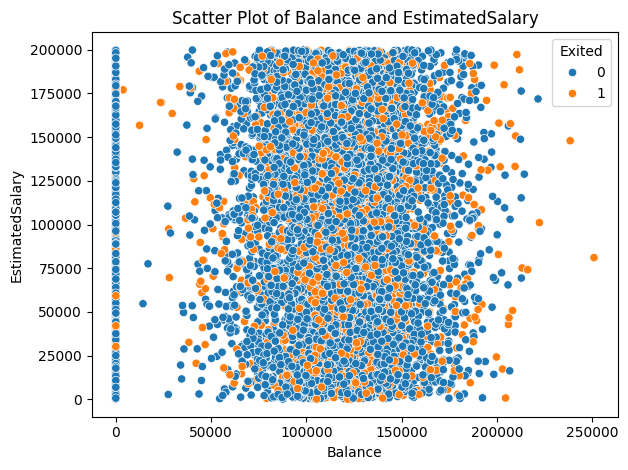

In [28]:
for col1, col2 in num_pairs:
    num_num_bivariate(data, col1, col2)


# -------------------------------------------------------------------------------------------
# Observation :

# The most observation across all these plots is the almost total lack of linear correlation between numerical features. The correlations score are consistently near zero.
# Features like CreditScore, EstimatedSalary, and Balance are independent of each other.

# CreditScore vs EstimatedSalary &  Balance vs EstimatedSalary
# The points are scattered uniformly across the grid. There are no clusters, lines.

# CreditScore vs Age & EstimatedSalary vs Age
# There is no linear line. The orange dots are heavily concentrated in the 40 to 60 age band, whereas the blue dots dominate the lower age band (<35). Age is strongest numerical driver of churn. 

# CreditScore vs Balance
# There is no pattern. High credit score customers are just as likely to have 0 balance as low credit score customers.

# -------------------------------------------------------------------------------------------

#### Bivariate Analysis - Categorical vs Numerical

In [29]:
def cat_num_bivariate(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    sns.barplot(df, x="Exited", y=col, ax=ax[0])
    ax[0].set_title(f"Barplot of Exited and {col}")
    ax[0].set_xlabel("Exited")
    ax[0].set_ylabel(col)

    sns.boxplot(df, x="Exited", y=col, ax=ax[1])
    ax[1].set_title(f"Boxplot of Exited and {col}")
    ax[1].set_xlabel("Exited")
    ax[1].set_ylabel("")

    plt.tight_layout()
    plt.show()

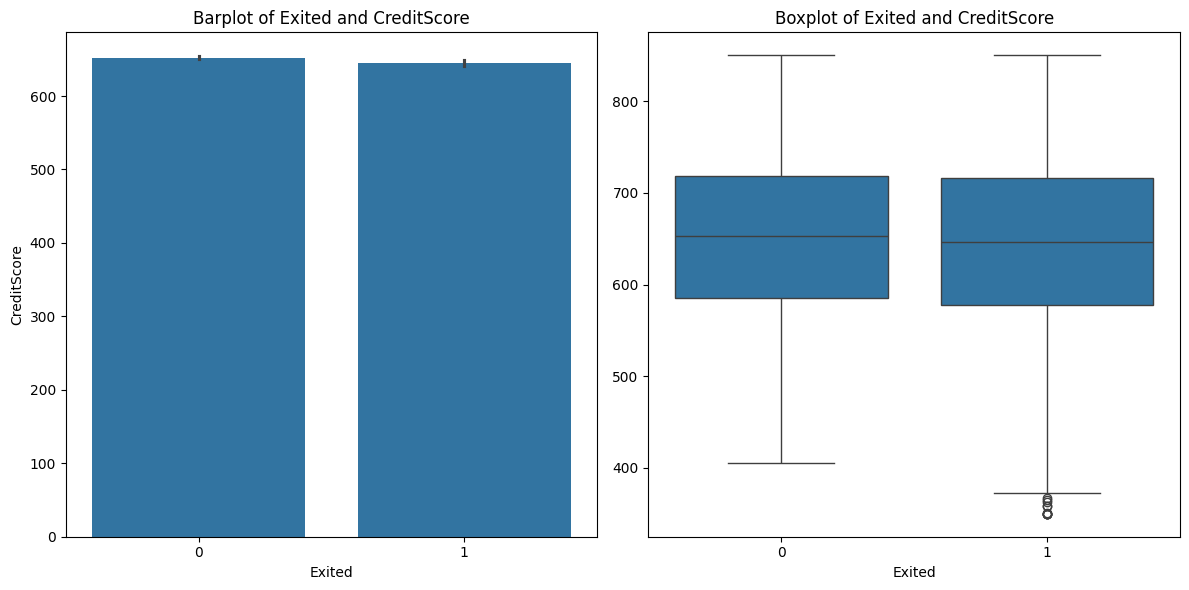

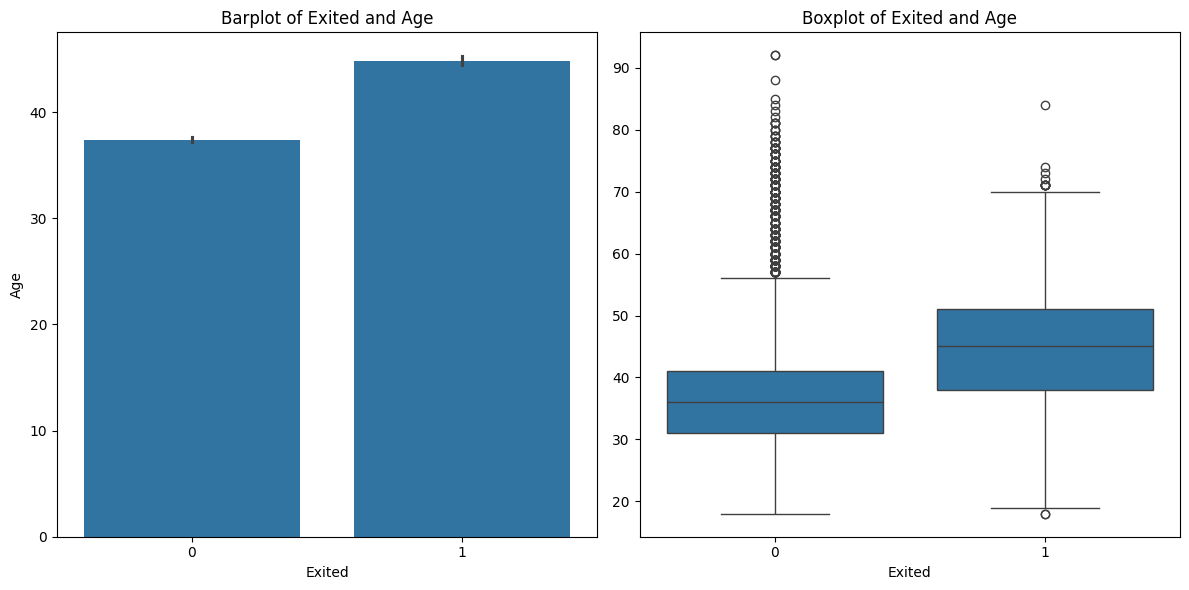

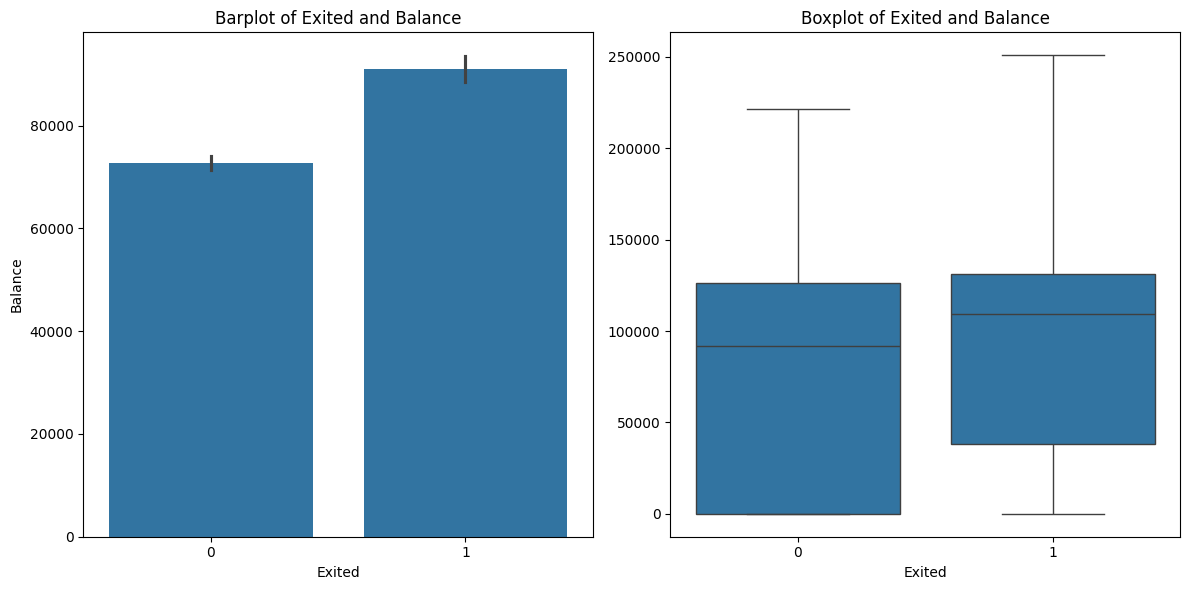

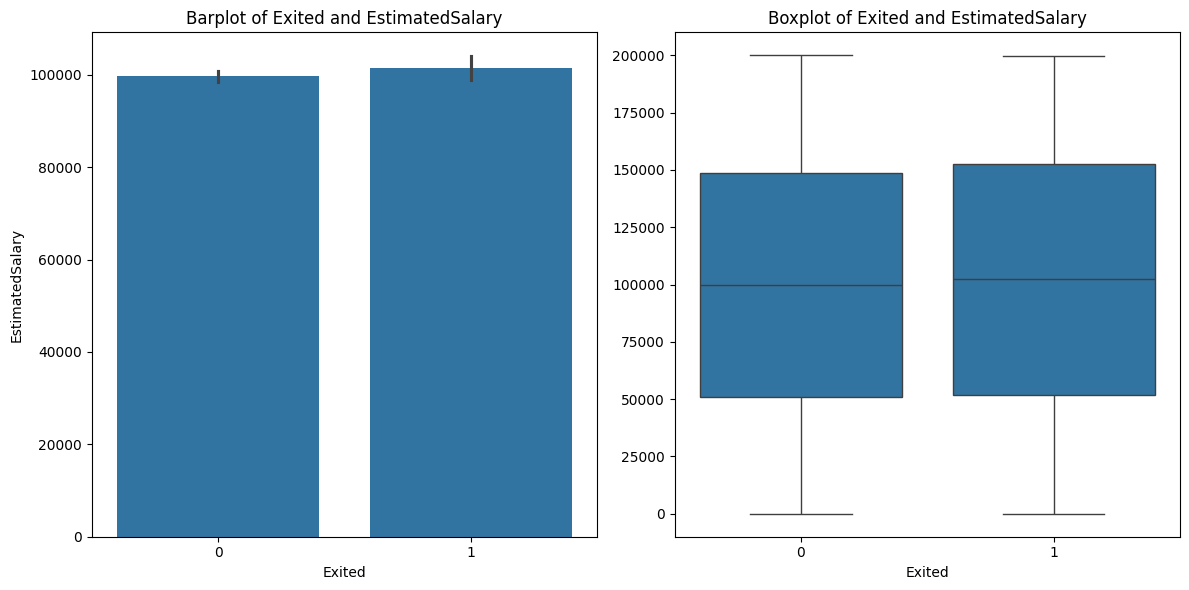

In [30]:
for col in numerical_cols:
    cat_num_bivariate(data, col)


# -------------------------------------------------------------------------------------------
# Observation :

# Exited vs CreditScore
# The distribution is almost identical. The median credit score for churners and non-churners is roughly the same (~650).

# Exited vs Age
# There is a clear separation. The exited group has higher average age compared to the not-exited group. The median line for churners is much higher, confirming that older customers are at higher risk.

# Exited vs Balance
# Churners tend to have a higher bank balance than non-churners. The average balance for exited is higher compared to those who stay.

# Exited vs EstimatedSalary
# The Boxplots and Barplots are nearly identical for both groups. 

# -------------------------------------------------------------------------------------------

#### Multivariate Analysis

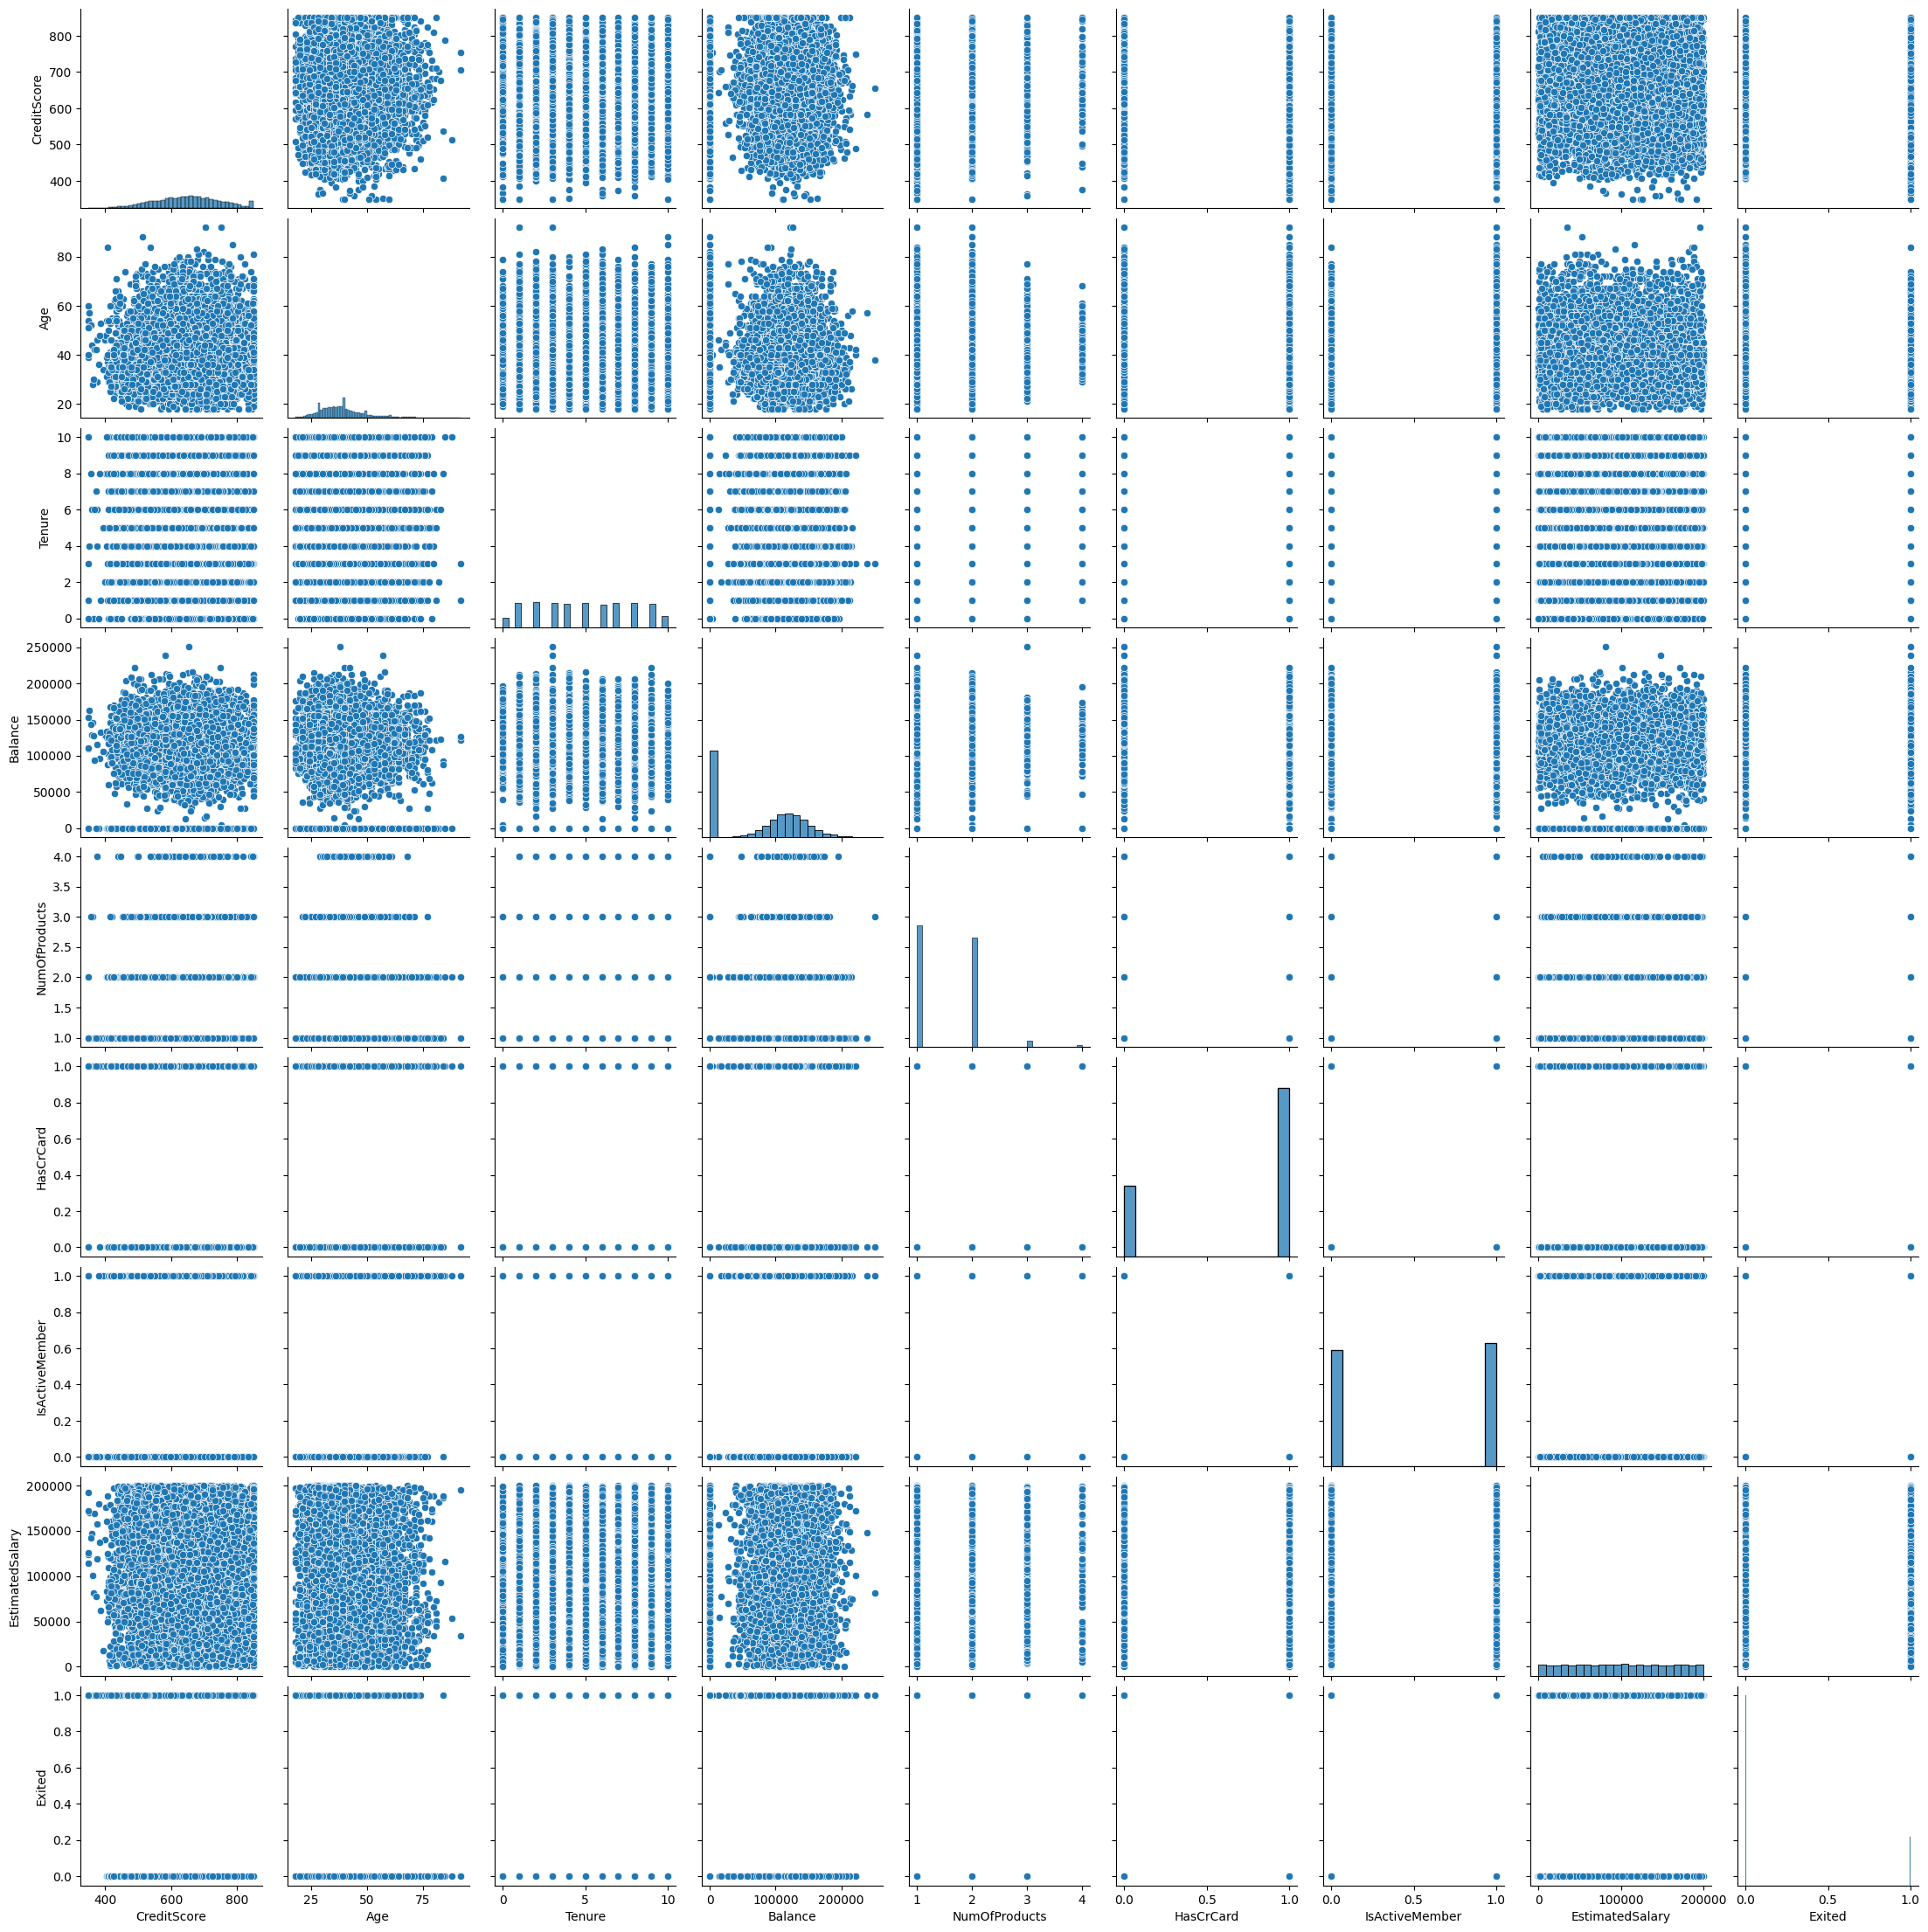

In [31]:
sns.pairplot(data)

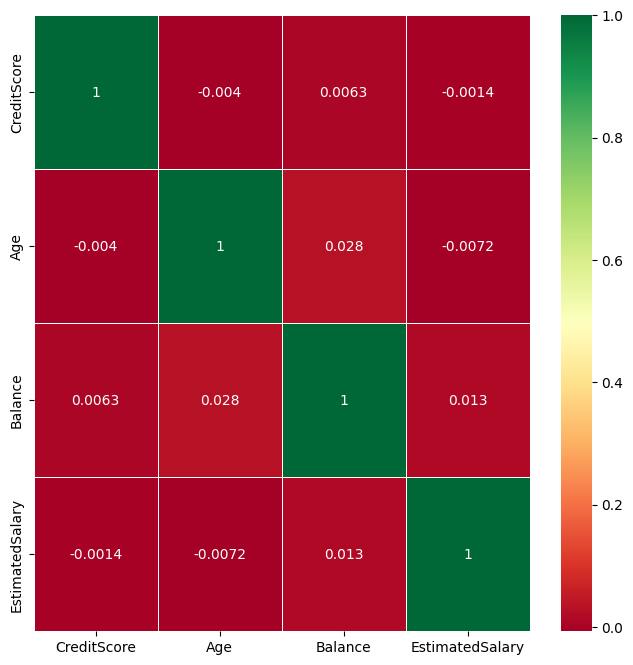

In [32]:
# plot co-relation in heat map to check multi-co-linearility between features
plt.subplots(figsize=(8,8))
sns.heatmap(data[numerical_cols].corr(),cmap= 'RdYlGn',annot=True, linewidths=0.5, linecolor="white")
plt.show()


# -------------------------------------------------------------------------------------------
# Observation :
# There is no correlations, most scores near to 0.
# -------------------------------------------------------------------------------------------

#### Split the Data

In [33]:
df = data.copy()

In [34]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
print(f"Train shape: {X_train.shape, y_train.shape}")
print(f"Test shape: {X_test.shape, y_test.shape}")

Train shape: ((8000, 10), (8000,))
Test shape: ((2000, 10), (2000,))


#### Exports the subsets

In [37]:
train = X_train
train["Exited"] = y_train
train.to_csv("../data/train.csv", index=False)

In [38]:
test = X_test
test["Exited"] = y_test
test.to_csv("../data/test.csv", index=False)